In [1]:
'''
Shiyang Zhang
July 25, 2022
Random forest for the narcissism and ML paper
'''

import pandas as pd
import numpy as np
import seaborn as sns
import os
import graphviz
import pydot
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn import tree
from dtreeviz.trees import dtreeviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
pd.set_option('display.max_columns', None)

In [22]:
# 1. Data preperation 
# 1.1 import dataset
df = shuffle(pd.read_csv(r"C:\Users\zsyan\Box Sync\SZhang\Lab\05 Language\Data_language\ear_analysis_clps.csv",header=0))
df = df.reset_index()  #(28243, 108)
# print(df.head())
# print(df.info())
# print(df.shape)  

# 1.2 convert dataframe to array, standardize
# x = df[df.columns[3:84]]   # select linguistic features
x = df[df.columns[4:84]]   # select linguistic features, remove word count
x = x.fillna(x.mean()).values
y = df[df.columns[97]].values   # select dichotomized narcissism
x = preprocessing.StandardScaler().fit(x[:,:]).transform(x[:,:].astype(float))

# 1.3 train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.7)
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)
print("training and testing data shape:\n", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

training and testing data shape:
 (196, 80) (85, 80) (196,) (85,)


In [5]:
'''
# 2. Decision tree
# 2.1 build a decision tree
clf = DecisionTreeClassifier(max_depth=7)
clf = clf.fit(x_train,y_train)
y_hat = clf.predict(x_test)
print('Decision Tree: \n','Accuracy:',metrics.accuracy_score(y_test,y_hat))
print('Precision:',metrics.precision_score(y_test,y_hat,average='macro'))
print('Recall:',metrics.recall_score(y_test,y_hat,average='macro'))

text_representation = tree.export_text(clf)

# 2.2 feature names excluding punctuations 
feature_names = ['wc','analytic','clout','authentic','tone','wps','sixltr','dic','function','pronoun','ppron','I','we',
                'you','shehe','they','ipron','article','prep','auxverb','adverb','conj','negate','verb','adj','compare',
                'interrog','number1','quant','affect','posemo','negemo','anx','anger','sad','social','family','friend',
                'female','male','cogproc','insight','cause','discrep','tentat','certain','differ','percept','see','hear',
                'feel','bio','body','health','sexual','ingest','drives','affiliation','achieve','power','reward','risk',
                'focuspast','focuspresent','focusfuture','relativ','motion','space','time','work','leisure','home',
                'money','relig','death','informal','swear','netspeak','assent','nonflu','filler']
class_names = ['Low Narcissism','High Narcissism']

# 2.3 visualization 1: export figure
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=feature_names,class_names=class_names,filled=True)
graph = graphviz.Source(dot_data,format='png')
graph.render('Narcissism_DecisionTree',view=True)

# 2.4 visualization 2: open in browser
viz = dtreeviz(clf,x_data=x_train,y_data=y_train,target_name='Narcissism',
                feature_names=feature_names,class_names=class_names)
viz.view()
'''

Decision Tree: 
 Accuracy: 0.606042723946654
Precision: 0.5485418846626964
Recall: 0.5118606192672884


In [23]:
# 3. Random forest
# 3.1 set up k-Fold (for calculating accuracy)
k = 5
kf = KFold(n_splits=k)

# 3.2 Random forest with k-Fold
rf = RandomForestClassifier(n_estimators=2000, random_state=15, max_depth=5, max_features='log2')
rf.fit(x_train, y_train)

# 3.3 make predictions and calculate accuracy
pred = rf.predict(x_test)
accuracy = cross_val_score(rf,x,y,cv=kf)
print("Accuracy:",accuracy.mean())
probas = rf.predict_proba(x_test)  # accuracy plot

Accuracy: 0.6297619047619047


"The AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve is used for visualizing the performance of the multi-class classification models. 
ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1."

The text above is cited from: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

In [24]:
# 3.4 define predictor features and outcome classes
# feature_names = ['wc','analytic','clout','authentic','tone','wps','sixltr','dic','function','pronoun','ppron','I','we',
#                 'you','shehe','they','ipron','article','prep','auxverb','adverb','conj','negate','verb','adj','compare',
#                 'interrog','number1','quant','affect','posemo','negemo','anx','anger','sad','social','family','friend',
#                 'female','male','cogproc','insight','cause','discrep','tentat','certain','differ','percept','see','hear',
#                 'feel','bio','body','health','sexual','ingest','drives','affiliation','achieve','power','reward','risk',
#                 'focuspast','focuspresent','focusfuture','relativ','motion','space','time','work','leisure','home',
#                 'money','relig','death','informal','swear','netspeak','assent','nonflu','filler']

# features (word count removed)
feature_names = ['analytic','clout','authentic','tone','wps','sixltr','dic','function','pronoun','ppron','I','we',
                'you','shehe','they','ipron','article','prep','auxverb','adverb','conj','negate','verb','adj','compare',
                'interrog','number1','quant','affect','posemo','negemo','anx','anger','sad','social','family','friend',
                'female','male','cogproc','insight','cause','discrep','tentat','certain','differ','percept','see','hear',
                'feel','bio','body','health','sexual','ingest','drives','affiliation','achieve','power','reward','risk',
                'focuspast','focuspresent','focusfuture','relativ','motion','space','time','work','leisure','home',
                'money','relig','death','informal','swear','netspeak','assent','nonflu','filler']
class_names = ['Low Narcissism','High Narcissism']

# 3.5 data visualization of model performance
'''
# 3.5.1 AUC-ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)  #false pos and true pos rates
roc_auc = auc(fpr, tpr)  #area under the curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('AUC-ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()
'''

# 3.5.2 Precision-Recall (PR) Curve
'''
precision, recall, thresholds = precision_recall_curve(y_test,probas[:,0],pos_label=0)
avg_precision = average_precision_score(y_test,probas[:,1])  # average precision score
pr_auc = auc(recall, precision)  # precision auc

plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()
'''

"\nprecision, recall, thresholds = precision_recall_curve(y_test,probas[:,0],pos_label=0)\navg_precision = average_precision_score(y_test,probas[:,1])  # average precision score\npr_auc = auc(recall, precision)  # precision auc\n\nplt.figure(dpi=150)\nplt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')\nplt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)\nplt.title('PR Curve for RF classifier')\nplt.xlabel('Recall (TPR)')\nplt.ylabel('Precision')\nplt.xlim([-0.05, 1.05])\nplt.ylim([-0.05, 1.05])\nplt.legend()\nplt.show()\n"

Variable: we                   Importance: 0.03505
Variable: achieve              Importance: 0.03065
Variable: work                 Importance: 0.02888
Variable: interrog             Importance: 0.02298
Variable: they                 Importance: 0.02287
Variable: you                  Importance: 0.0222
Variable: auxverb              Importance: 0.02211
Variable: leisure              Importance: 0.02111
Variable: body                 Importance: 0.01736
Variable: discrep              Importance: 0.01731
Variable: ppron                Importance: 0.01705
Variable: power                Importance: 0.01648
Variable: hear                 Importance: 0.01515
Variable: reward               Importance: 0.01493
Variable: focuspast            Importance: 0.01478
Variable: ingest               Importance: 0.01447
Variable: nonflu               Importance: 0.01444
Variable: I                    Importance: 0.01435
Variable: adverb               Importance: 0.01427
Variable: adj                  I

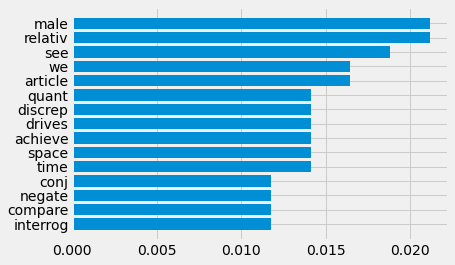

In [25]:
# 3.6 data visualization of the random forest model 
# 3.6.1 visualize a single tree
# Note that the results of a single tree may or may not match the results of the random forest model, 
# because the random forest model is the ensemble of 2000 decision trees. 
'''
tree = rf.estimators_[5]  # pull out one tree from the forest
export_graphviz(tree, out_file='tree_dot.dot',feature_names = feature_names,class_names=class_names,filled=True,rounded=True,precision=1)
(graph, ) = pydot.graph_from_dot_file('tree_dot.dot')
graph.write_png('tree_fromforest.png')
'''

# 3.6.2 feature importance
# '''
# calculate feature importance
importances = list(rf.feature_importances_)  # get numerical feature importances- type is list
feature_importances = [(feature, round(importance, 5)) for feature, importance in 
                        zip(feature_names, importances)]   # list of tuples with features and importances
feature_importances = sorted(feature_importances, key=lambda x:x[1], reverse=True)  # sort
for pair in feature_importances[0:20]:
    print('Variable: {:20} Importance: {}'.format(*pair))  
# select the top n features and importances
top_n = 15
feature_name_top = []
importance_top = []
for pair in feature_importances:
    feature_name_top.append(pair[0])
    importance_top.append(pair[1])
feature_name_top = feature_name_top[0:top_n]
importance_top = importance_top[0:top_n]
# visualization
perm_importance = list(permutation_importance(rf, x_test, y_test).importances_mean)  # get permutation importances list
feature_perm_importances = [(feature, round(perm_importance, 5)) for feature, perm_importance in 
                        zip(feature_names, perm_importance)]
feature_perm_importances = sorted(feature_perm_importances, key=lambda x:x[1], reverse=True)
feature_name_perm_top = []
perm_importance_top = []
for pair in feature_perm_importances:
    feature_name_perm_top.append(pair[0])
    perm_importance_top.append(pair[1])
feature_name_perm_top = feature_name_perm_top[0:top_n]
perm_importance_top = perm_importance_top[0:top_n]
feature_name_perm_top = feature_name_perm_top[::-1]
perm_importance_top = perm_importance_top[::-1]

plt.style.use('fivethirtyeight')
plt.barh(feature_name_perm_top, perm_importance_top)
plt.show()
# '''

In [7]:
# 4. Correlation heatmap
# plot: https://zhuanlan.zhihu.com/p/364624304
# settings: https://zhuanlan.zhihu.com/p/165426873

# create a dataset with linguistic features and dichotomized narcissism
df_new = df.iloc[:,np.r_[3:84,97]]
df_new.head()
# generate correlation matrix
df_corr = df_new.corr()
df_corr.head()
df_corr_nar = df_corr[['narh']]   # select the column for narcissism
df_corr_nar = df_corr_nar.head(81)   # drop the final row (narh itself)
df_corr_nar  # 81 rows × 1 columns

plt.subplots(figsize=(9,9),dpi=1080,facecolor='w')
fig=sns.heatmap(df_corr_nar,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
fig
fig.get_figure().savefig('df_corr1.png',bbox_inches='tight')

'\ndf_corr_nar1 = df_corr_nar[0:9]\ndf_corr_nar2 = df_corr_nar[9:18]\ndf_corr_nar3 = df_corr_nar[18:27]\ndf_corr_nar4 = df_corr_nar[27:36]\ndf_corr_nar5 = df_corr_nar[36:45]\ndf_corr_nar6 = df_corr_nar[45:54]\ndf_corr_nar7 = df_corr_nar[54:63]\ndf_corr_nar8 = df_corr_nar[63:72]\ndf_corr_nar9 = df_corr_nar[72:81]\n\nplt.subplots(figsize=(9,9),dpi=1080,facecolor=\'w\')\nfig=sns.heatmap(df_corr_nar1,annot=True, vmax=1, square=True, cmap="Blues", fmt=\'.2g\')\nfig\nfig.get_figure().savefig(\'df_corr1.png\',bbox_inches=\'tight\')\n'

In [29]:
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# 5. Sensitivity test- continuous narcissism
# 5.1 convert dataframe to array, standardize
df.loc[:,'nar'] += 0.01  # avoid nar=0
x = df[df.columns[3:84]]   # select linguistic features
x = x.fillna(x.mean()).values
y = df[df.columns[96]].values   # select continuous narcissism
y = df.loc[:,'nar'].values   # select continuous narcissism
x = preprocessing.StandardScaler().fit(x[:,:]).transform(x[:,:].astype(float))

# 5.2 train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.7)
print("training and testing data shape:\n", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# 5.3 build random forest model
rf = RandomForestRegressor(n_estimators=2000, random_state=42)
rf.fit(x_train, y_train)

# 5.4 make predictions
predictions = rf.predict(x_test)
errors = abs(predictions-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# 5.5 performance matrix
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# 5.6 feature importance
# feature_names = ['wc','analytic','clout','authentic','tone','wps','sixltr','dic','function','pronoun','ppron','I','we',
#                 'you','shehe','they','ipron','article','prep','auxverb','adverb','conj','negate','verb','adj','compare',
#                 'interrog','number1','quant','affect','posemo','negemo','anx','anger','sad','social','family','friend',
#                 'female','male','cogproc','insight','cause','discrep','tentat','certain','differ','percept','see','hear',
#                 'feel','bio','body','health','sexual','ingest','drives','affiliation','achieve','power','reward','risk',
#                 'focuspast','focuspresent','focusfuture','relativ','motion','space','time','work','leisure','home',
#                 'money','relig','death','informal','swear','netspeak','assent','nonflu','filler']

# features (word count removed)
feature_names = ['analytic','clout','authentic','tone','wps','sixltr','dic','function','pronoun','ppron','I','we',
                'you','shehe','they','ipron','article','prep','auxverb','adverb','conj','negate','verb','adj','compare',
                'interrog','number1','quant','affect','posemo','negemo','anx','anger','sad','social','family','friend',
                'female','male','cogproc','insight','cause','discrep','tentat','certain','differ','percept','see','hear',
                'feel','bio','body','health','sexual','ingest','drives','affiliation','achieve','power','reward','risk',
                'focuspast','focuspresent','focusfuture','relativ','motion','space','time','work','leisure','home',
                'money','relig','death','informal','swear','netspeak','assent','nonflu','filler']
class_names = ['Low Narcissism','High Narcissism']
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_names, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

training and testing data shape:
 (196, 81) (85, 81) (196,) (85,)
Mean Absolute Error: 0.13
Accuracy: -20.66 %.
Variable: you                  Importance: 0.06
Variable: ipron                Importance: 0.06
Variable: leisure              Importance: 0.06
Variable: auxverb              Importance: 0.05
Variable: power                Importance: 0.03
Variable: wps                  Importance: 0.02
Variable: number1              Importance: 0.02
Variable: cause                Importance: 0.02
Variable: health               Importance: 0.02
Variable: risk                 Importance: 0.02
Variable: home                 Importance: 0.02
Variable: nonflu               Importance: 0.02
Variable: filler               Importance: 0.02
Variable: analytic             Importance: 0.01
Variable: clout                Importance: 0.01
Variable: authentic            Importance: 0.01
Variable: tone                 Importance: 0.01
Variable: sixltr               Importance: 0.01
Variable: dic           